# Model Structure and Selection Criterion

# Model Structures - Defining the Model Set

# Recall the Predictor

$$
\hat{y}(t|t-1,\theta) = H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t)
$$

Need to choose how to parameterize $G(q,\theta)$ and $H(q,\theta)$. 

Let $A(q,\theta)$, $B(q,\theta)$, $C(q,\theta)$, $D(q,\theta)$ and $F(q,\theta)$ be polynomials in $q$:
$$
\begin{align*}
A(q,\theta_a) &= 1 + a_1q^{-1} + a_2q^{-2} + \cdots + a_{n_a}q^{-n_a} \\
B(q,\theta_b) &= b_0 + b_1q^{-1} + b_2q^{-2} + \cdots + b_{n_b}q^{-n_b} \\
C(q,\theta_c) &= 1 + c_1q^{-1} + c_2q^{-2} + \cdots + c_{n_c}q^{-n_c} \\
D(q,\theta_d) &= 1 + d_1q^{-1} + d_2q^{-2} + \cdots + d_{n_d}q^{-n_d} \\
F(q,\theta_f) &= 1 + f_1q^{-1} + f_2q^{-2} + \cdots + f_{n_f}q^{-n_f} 
\end{align*}
$$
where $\theta$ represents the unknown parameters:
$$
\begin{align*}
\theta_a &= \big[a_1 \ \cdots \ a_{n_a}\big]^T \\
\theta_b &= \big[b_1 \ \cdots \ b_{n_b}\big]^T \\
\theta_c &= \big[c_1 \ \cdots \ c_{n_c}\big]^T \\
\theta_d &= \big[d_1 \ \cdots \ d_{n_d}\big]^T \\
\theta_f &= \big[f_1 \ \cdots \ f_{n_f}\big]^T 
\end{align*}
$$

# Common Parameterizations

| Model Name | Equation      | $G(z,\theta)$ | $H(z,\theta)$        | $\theta$ | 
| --------- | -------- | -------- | ------- | ------- |
| ARX | $y(t) = \frac{B(q,\theta)}{A(q,\theta)}u(t) + \frac{1}{A(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{A(q,\theta)}$ | $\frac{1}{A(q,\theta)}$ | $\big [ \theta_a^T \ \theta_b^T  \big ]^T$ |
| ARMAX | $y(t) = \frac{B(q,\theta)}{A(q,\theta)}u(t) + \frac{C(q,\theta)}{A(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{A(q,\theta)}$ | $\frac{C(q,\theta)}{A(q,\theta)}$ | $\big [ \theta_a^T \ \theta_b^T \ \theta_c^T \big ]^T$ |
| Output Error (OE) | $y(t) = \frac{B(q,\theta)}{F(q,\theta)}u(t) + e(t)$ | $\frac{B(q,\theta)}{F(q,\theta)}$ | $1$ | $\big [ \theta_b^T \ \theta_f^T \big ]^T$ |
| Finite Impulse Repsonse (FIR) | $y(t) = B(q,\theta)u(t) + e(t)$ | $B(q,\theta)$ | $1$ | $\theta_b^T$ |
| Box-Jenkins | $y(t) = \frac{B(q,\theta)}{F(q,\theta)}u(t) + \frac{C(q,\theta)}{D(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{F(q,\theta)}$ | $\frac{C(q,\theta)}{D(q,\theta)}$ | $\big [ \theta_b^T \ \theta_c^T \ \theta_d^T \ \theta_f^T \big ]^T$ |



# Selection Criterion

Prediction error:
$$
\varepsilon(t,\theta) = y(t) - \hat{y}(t|t-1,\theta)
$$
Sum of squared prediction errors:
$$
V_N(\theta) = \sum_{t=0}^{N-1} \varepsilon(t,\theta)^2
$$


In the following text we will analyze some advantages and disadvantages for each of the model structures. 

# ARX model structure
We will start by analyzing the ARX model structure. 

In this case, the predictor has the form:
$$
\begin{align*}
\hat{y}(t|t-1,\theta) &= H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t) \\
&=A(q,\theta)\frac{B(q,\theta)}{A(q,\theta)} u(t) + (1- A(q,\theta))y(t) \\
&=B(q,\theta) u(t) - (1- A(q,\theta))y(t)
\end{align*}
$$
Prediction Error:
$$
\begin{align*}
\varepsilon(t,\theta) &=  y(t) - \hat{y}(t|t-1,\theta)\\
&= B(q,\theta)u(t) - A(q,\theta)y(t)
\end{align*}
$$
Suppose $G$ is parameterized as:
$$
G(q,\theta) = \frac{b_0+b_1q^{-1}}{1+a_1q^{-1}}.
$$
Then the prediction error can be expressed as:
$$
\begin{align*}
\varepsilon(t,\theta) &= b_0u(t) + b_1q^{-1}u(t) - y(t) - a_1q^{-1}y(t) \\
&=  b_0u(t) + b_1u(t-1) - y(t) - a_1y(t-1) \\
&= \begin{bmatrix} -y(t-1) & u(t) & u(t-1)\end{bmatrix} \begin{bmatrix} a_1 \\ b_0 \\ b_1 \end{bmatrix} - y(t)
\end{align*}
$$

# Finding the model that minimizes the mean squared prediction error for a model with the ARX model structure

For the ARX model structure, it turns out that we can derive and expression for the optimal solution (i.e. the model that minimizes the sum of squared prediction errors). 

When deriving this expression, it is useful to write the objective function in terms of matrices and arrays.
$$
V_N = \sum_{t=0}^{N-1} \varepsilon^2(t,\theta) = \vec{\varepsilon}(\theta)^T \vec{\varepsilon}(\theta)
$$
where 
$$
\vec{\varepsilon}(\theta) = \begin{bmatrix} \varepsilon(0,\theta) \\ \varepsilon(1,\theta) \\ \vdots \\ \varepsilon(N-1,\theta) \end{bmatrix}.
$$

Using the matrix expression for $\varepsilon$ derived in the previous slide, we can construct a matrix equation for $\vec{\varepsilon}$:
$$ 
\begin{align*}
\begin{bmatrix} \varepsilon(0,\theta) \\ \varepsilon(1,\theta) \\ \vdots \\ \varepsilon(N-1,\theta) \end{bmatrix} &=
\begin{bmatrix} 
-y(-1) & u(0) & u(-1)  \\ 
-y(0) & u(1) & u(0)  \\ 
-y(1) & u(2) & u(1)  \\ 
-y(2) & u(3) & u(2)  \\ 
\vdots & \vdots & \vdots \\
-y(N-1) & u(N) & u(N-1) \end{bmatrix} -
\begin{bmatrix} y(1) \\ y(2) \\ y(3) \\ \vdots \\ y(N) \end{bmatrix} \\
\vec{\varepsilon}(\theta) &= \phi \theta + \vec{y},
\end{align*}
$$
where $\phi$, and $\vec{y}$ are implicitly defined.

To find the minimum of this objective function we will take the following steps:
1. Derive an expression for the derivative of the objective function $V_N$.
2. Set the derivative to zero. This results in an equation that is satisfied at any local minumum, maximum, or inflection point of the objective function.
3. Solve the equation from step 2 for $\theta$, call it $\hat{\theta}$. Now we have an expression for $\theta$ at any minimum, maximum or inflection point of $V_N$. It turns out that this objective function only has 1 minimum. So $\hat{\theta}$ is a global minimizer of $V_N$. 
4. From $\hat{\theta}$ we can construct an estmate of the system transfer function $G(q,\hat{\theta})$. 



# Aside on Vector Calculus

Before we proceed, need to drive a few expressions for derivatives involving vectors and matrices. 

When we take the derivative of a scalar function $f(\vec{x})$ with respect to a ($n \times 1$) vector, $\vec{x}$, what we actually mean is that we want to calculate the derivative of $f(\vec{x})$ with respect to each element of $\vec{x}$. Let 
$$
\frac{df}{d\vec{x}} = \begin{bmatrix} \frac{df}{dx_1} \\ \frac{df}{dx_2} \\ \vdots \\ \frac{df}{dx_n} \end{bmatrix}
$$

Similarly, suppose that the function $\vec{g}(\vec{x})$ is a ($m \times 1$) vector, and $\vec{x}$ is a ($n \times 1$) vector. Then, taking the derivative of a vector with respect to a vector is defined as:
$$
\frac{d\vec{g}}{d\vec{x}} = \begin{bmatrix} \frac{dg_1}{dx_1} & \cdots & \frac{dg_m}{dx_1} \\ 
\frac{dg_1}{dx_2} & \cdots & \frac{dg_m}{dx_2} \\ 
\vdots & & \vdots \\
\frac{dg_1}{dx_n} & \cdots & \frac{dg_m}{dx_n} \end{bmatrix}.
$$

# Some Selected Identities

# Identity 1
Let $\vec{x}$ be a vector and $A$ be a matrix (of appropriate dimensions). Consider the following identity:
$$
\frac{\text{d}}{\text{d}\vec{x}} \vec{x}^TA = A
$$

As an illustration of the identity (to convince you that it is true), consider ($3 \times 1$) vector $\vec{x}$ and a $(2 \times 3)$ matrix $A$. Let's calculate the derivative to verify the identity:
$$
\begin{align*}
\frac{d}{d\vec{x}} \vec{x}^T A &=\frac{d}{d\vec{x}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \\
&= \frac{d}{d\vec{x}} \begin{bmatrix} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} &  x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32}\end{bmatrix} \\
&= \begin{bmatrix} \frac{d}{dx_1} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} &\frac{d}{dx_1}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32} \\
\frac{d}{dx_2} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31}  &\frac{d}{dx_2}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32} \\
\frac{d}{dx_3} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} & \frac{d}{dx_3}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32}\end{bmatrix}\\
&=\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \\
&=A
\end{align*}
$$

# Identity 2

Let $\vec{x}$ be a vector. Consider the following identity:
$$
\frac{\text{d}}{\text{dx}} A\vec{x} = A^T
$$
Similarly, consider the following illustration of the identity for a $(2 \times 1)$ vector $\vec{x}$ and a ($3 \times 2$) matrix $A$:
$$
\begin{align*}
\frac{\text{d}}{\text{dx}} A\vec{x} &= \frac{\text{d}}{\text{dx}} \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
&= \frac{\text{d}}{\text{dx}} \begin{bmatrix}a_{11}x_1 + a_{12}x_2 \\ a_{21}x_1 + a_{22}x_2 \\a_{31}x_1 + a_{32}x_2 \end{bmatrix}\\
&=\begin{bmatrix} \frac{\text{d}}{dx_1}a_{11}x_1 + a_{12}x_2 & \frac{\text{d}}{dx_1}a_{21}x_1 + a_{22}x_2 &\frac{\text{d}}{dx_1}a_{31}x_1 + a_{32}x_2 \\
\frac{\text{d}}{dx_2}a_{11}x_1 + a_{12}x_2 & \frac{\text{d}}{dx_2}a_{21}x_1 + a_{22}x_2 &\frac{\text{d}}{dx_3}a_{31}x_1 + a_{32}x_2 \end{bmatrix} \\
&= \begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{12} & a_{22} & a_{32}\end{bmatrix} \\
&= A^T
\end{align*}
$$


# Identity 3
Let $\vec{x}$ be a vector. Consider the following identity:
$$
\frac{\text{d}}{\text{dx}} \vec{x}^TA\vec{x} = A\vec{x} + A^T\vec{x} 
$$
Again, consider the following illustration of the identity for a $(3 \times 1)$ vector $\vec{x}$ and a ($3 \times 3$) matrix $A$:
$$
\begin{align*}
\frac{\text{d}}{\text{dx}} \vec{x}^TA\vec{x} &= \frac{\text{d}}{\text{dx}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
&=\frac{\text{d}}{\text{dx}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} \begin{bmatrix}a_{11}x_1 + a_{12}x_2 + a_{13}x_3 \\ a_{21}x_1 + a_{22}x_2+a_{23}x_3 \\ a_{31}x_1 + a_{32}x_2 + a_{33}x_3\end{bmatrix}\\
&=\frac{\text{d}}{\text{dx}} (a_{11}x_1^2 + a_{12}x_1x_2 + a_{13}x_1x_3 + a_{21}x_2x_1 + a_{22}x_2^2+a_{23}x_2x_3 + a_{31}x_3x_1 + a_{32}x_3x_2 + a_{33}x_3^2) \\
&=\begin{bmatrix} 2a_{11}x_1 + a_{12}x_2 + a_{21}x_2 + a_{13}x_3 + a_{31}x_3  \\
a_{12}x_1 + a_{21}x_1 + 2a_{22}x_2 + a_{23}x_3 + a_{32}x_3  \\
a_{13}x_1 + a_{31}x_1 + a_{23}x_2 + a_{32}x_2 + 2a_{33}x_3 \end{bmatrix} \\
&=\begin{bmatrix} 2a_{11}x_1 + (a_{12}+a_{21})x_2 + (a_{13} + a_{31})x_3  \\
(a_{12} + a_{21})x_1 + 2a_{22}x_2 + (a_{23} + a_{32})x_3  \\
(a_{13} + a_{31})x_1 + (a_{23} + a_{32})x_2 + 2a_{33}x_3 \end{bmatrix} \\
&= \Bigg( \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} + \begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{12} & a_{22} & a_{32} \\ a_{13} & a_{23} & a_{33} \end{bmatrix} \Bigg ) \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
&= A\vec{x} + A^T \vec{x}
\end{align*}
$$

# Back to calculating minimizer of $V_{N}$ for a model with ARX model structure

Recall the expression for the prediction error that we derived (before the aside on matrix calculus):
$$
\vec{\varepsilon}(\theta) = \phi \theta + \vec{y}.
$$
Then the expression for the sum of squared prediction errors is:
$$
\begin{align*}
V_N &= (\phi \theta + \vec{y})^T(\phi \theta + \vec{y}) \\
&= \theta^T\phi^T\phi\theta + \theta^T\phi^T\vec{y} +\vec{y}^T\phi\theta + \vec{y}^T\vec{y}
\end{align*}
$$
Now, using the matrix calculus identities, we can calculate the derivative of $V_N$ with respect to $\theta$:
$$
\begin{align*}
\frac{dV_{N}}{d\theta} &= 2\phi^T\phi\theta - \phi^T\vec{y} - \phi^T\vec{y} \\
&= 2\phi^T\phi\theta - 2\phi^T\vec{y}
\end{align*}
$$
Setting the derivative to zero and solving for $\theta$ results in:
$$
\begin{align*}
2\phi^T\phi\hat{\theta} - 2\phi^T\vec{y} &= 0 \\
\phi^T\phi\hat{\theta} &= \phi^T\vec{y} \\
\hat{\theta} &= (\phi^T\phi)^{-1}\phi^T\vec{y} 
\end{align*}
$$
where, for now, we will assume that the data is such that the inverse of $\phi^T\phi$ exists. Thus we have obtained an expression for the parameter vector $\hat{\theta}$ that minimizes the sum of squared prediction errors for a model with the ARX model structure! Using this parameter vector, we can construct an estimate for the plant:
$$
G(q,\hat{\theta})= \frac{B(q,\hat{\theta})}{A(q,\hat{\theta})}
$$

# Experiment 1

- Given the correct number of poles and zeros of the plant and noise model, obtain an estimate of the plant dynamics using a model with ARX model structure.
- Are estimated plant dynamics biased?


In [3]:
import sysid_pem as sid
import numpy as np
import scipy as sp
import control as ct
import matplotlib.pyplot as plt

In [4]:
def generate_data(B0,C0,D0,F0,N,sigma_v):
    u = np.random.randn(N)
    #v = sp.signal.lfilter(C0, D0, np.random.randn(N))
    #y = sp.signal.lfilter(B0, F0, u) #+ v
    e = np.random.randn(N)
    H0 = ct.tf(C0,D0,True)
    tt,v = ct.forced_response(H0,U=e)
    G0 = ct.tf(B0,F0,True)
    tt,y = ct.forced_response(G0,U=u)
    y = y + sigma_v*v
    return u, y

In [5]:
F0 = np.real(np.convolve([1, -0.2+0.8j],np.convolve([1, -0.2-0.8j],np.convolve([1, -0.6+0.7j],[1, -0.6-0.7j]))))
B0 = np.real(np.convolve([1, -0.7+0.2j],[1, -0.7-0.2j]))
C0 = np.real(np.convolve([1, 0.1+0.9j],[1, 0.1-0.9j]))
D0 = np.real(np.convolve([1, -0.5+0.75j],[1, -0.5-0.75j]))
 
G0 = ct.tf(B0,F0,True)
H0 = ct.tf(C0,D0,True)
print('Data Generating System:')
print('Plant:', G0)
print('Noise:', H0)

N = 1001
sigma_v = 1

na = 4
nb = 3
nk = 2
n_arx = [na, nb, nk]

num_iter = 100
poles_arx = np.empty((num_iter,na),dtype=complex)
for ii in range(num_iter):
    u, y = generate_data(B0,C0,D0,F0,N,sigma_v)
  
    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)
    poles_arx[ii,:] = np.roots(np.concatenate(([1],theta_arx[0:na])))



Data Generating System:
Plant: 
            z^2 - 1.4 z + 0.53
------------------------------------------
z^4 - 1.6 z^3 + 2.01 z^2 - 1.156 z + 0.578

Noise: 
z^2 + 0.2 z + 0.82
------------------
 z^2 - z + 0.8125



Text(0.5, 0, 'Real')

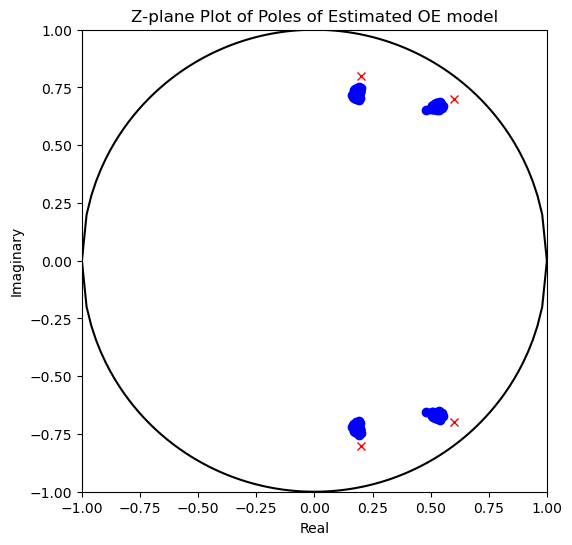

In [6]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    ax.plot(np.real(poles_arx[ii,:]), np.imag(poles_arx[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')

# Observations on ARX Model Structure
1. Analytical solution exists for finding the parameters such that the sum of squared prediction error is minimized (big advatage!).
1. Poles are biased: center of the cluster of estimated poles does not align with the poles of the data generating system (disadvantage).
2. As the noise level is increased, the variance of the estimated poles becomes larger: as the noise power is increased, the size of the cluster increases.

# Output Error Model Structure

Next, let's look at the OE model structure:
$$
\begin{align*}
G(q,\theta) &= \frac{B(q,\theta)}{F(q,\theta)} = \frac{b_0q^{-n_k}+b_1q^{n_k-1}+\cdots+b_{n_b}q^{-n_k-n_b}}{1 + f_1q^{-1}+f_2q^{-2}+\cdots+f_{n_f}q^{-n_f}}\\
H(q,\theta)&= 1
\end{align*}
$$
where
$$
\theta = \begin{bmatrix} b_0 \\ \vdots \\ b_{n_b} \\ f_1  \\ \vdots \\ f_{n_f} \end{bmatrix}
$$
The predictor has the form:
$$
\begin{align*}
\hat{y}(t|t-1,\theta) &= H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t) \\
&= G(q,\theta)u(t)
\end{align*}
$$


# Finding the model that minimizes the mean squared prediction error for a model with the OE model structure

Selection Criterion:
$$
\begin{align*}
V_N(\theta) &= \sum_{t=0}^{N-1} y(t)-\hat{y}(t|t-1,\theta) \\
&= \sum_{t=0}^{N-1} y(t) - G(q,\theta)u(t)
\end{align*}
$$

To select the best model is then equivalent to selecting the model that has the smallest sum of squared prediction errors. This is equal to solving the optimization problem:
$$
\text{minimize} V_N(\theta)
$$
and the best model is determined by the $\theta$ at the minimim of $V_{N}$:
$$
\hat{\theta} = \arg \min V_{N}(\theta)
$$

How do we minimize $V_N$?

# Gradient Descent Optimization

We must take another aside here to briefly learn about gradient descent based optimization. 

In [2]:
import control as ct
import numpy as np
import scipy as sp  
import matplotlib.pyplot as plt
import sysid_pem as sid 

In [13]:
def V_obj(x):
    return x**4 - 4*x**3 - 2*x**2 + 5*x + 9

x0 = np.random.randn(1) #choose an starting point for the optimization
optimization_results = sp.optimize.minimize(V_obj, x0)

print('Initial value of objective function:', V_obj(x0))
print('Final value of objective function:', optimization_results.fun)
print('Value of x at final value of objective function:', optimization_results.x)

Initial value of objective function: [9.41973043]
Final value of objective function: -21.696233024904355
Value of x at final value of objective function: [3.19062942]


Text(0.5, 1.0, 'Objective Function')

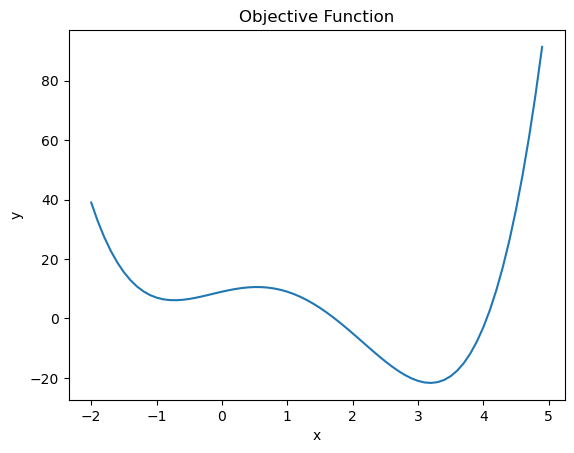

In [14]:
x = np.arange(-2,5,0.1)
fig,ax = plt.subplots(1)
y = [V_obj(x) for x in x]

ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Objective Function')


# Back to Output-Error Model Structure

# Experiment #2 - Output Error Model Structure

Suppose that we know the correct model orders for the plant. What does the bias and vairance of the estimated model look like?

In [9]:
nf = 4
nb = 3
nc = 0
nd = 0
nk = 2

na = nf
n_arx = [na, nb, nk]
n_oe = [nb, nc, nd, nf, nk]

sigma_v=1

num_iter = 100
poles_oe = np.empty((num_iter,nf),dtype=complex)
V_opt_oe = np.empty(num_iter)
for ii in range(num_iter):
    print('Iteration:',ii)
    u, y = generate_data(B0,C0,D0,F0,N,sigma_v)

    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)

    theta_oe = np.concatenate((theta_arx[n_arx[0]:n_arx[0]+n_arx[1]],theta_arx[0:n_arx[0]]))  

    optimization_results_oe = sp.optimize.least_squares(sid.V_box_jenkins, theta_oe, jac=sid.jac_V_bj, args=(n_oe,y,u))

    poles_oe[ii,:] = np.roots(np.concatenate(([1],optimization_results_oe.x[n_oe[0]+n_oe[1]+n_oe[2]:n_oe[0]+n_oe[1]+n_oe[2]+n_oe[3]])))
    V_opt_oe[ii] = np.sum(optimization_results_oe.fun**2)



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

Text(0, 0.5, 'Number of Occurences')

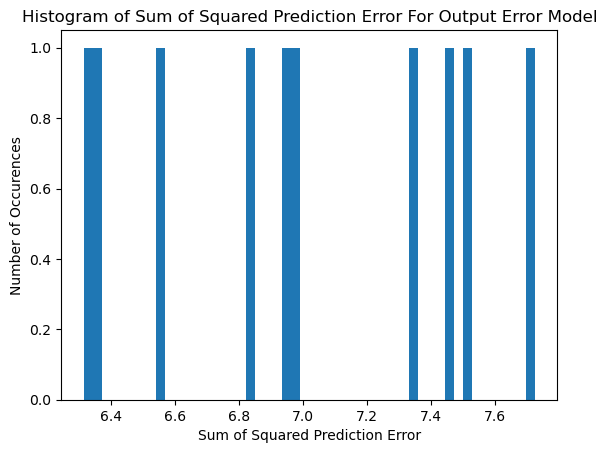

In [19]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_oe/N,bins=50)
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')


Text(0.5, 0, 'Real')

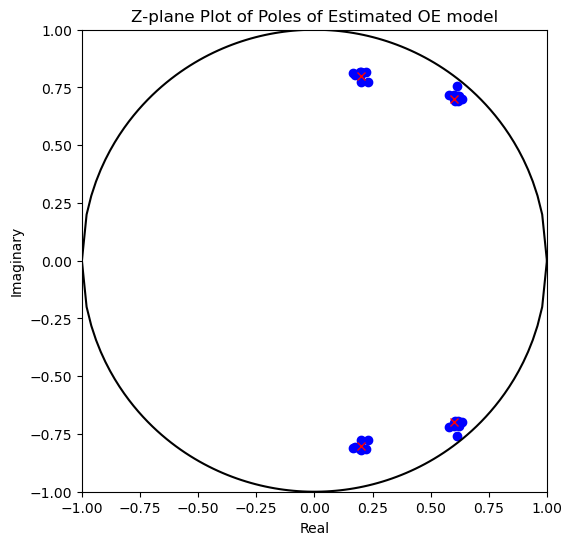

In [20]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    if not np.isnan(V_opt_oe[ii]):
        ax.plot(np.real(poles_oe[ii,:]), np.imag(poles_oe[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')


# Experiment 3 - Undermodelling

Suppose that we select the OE model structure. But we choose the order of the denominator and numerator to be less than the orders of the data generating system. What happens to the bias and variance of the estimated model?

In [ ]:
nf = 2
nb = 2
nc = 0
nd = 0
nk = 2

na = nf
n_arx = [na, nb, nk]
n_oe = [nb, nc, nd, nf, nk]

num_iter = 100
poles_oe_under = np.empty((num_iter,nf),dtype=complex)
V_opt_oe_under = np.empty(num_iter)
for ii in range(num_iter):
    #print('Iteration:',ii)
    u, y = generate_data(B0,C0,D0,F0,N,sigma_v)

    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)

    theta_oe = np.concatenate((theta_arx[n_arx[0]:n_arx[0]+n_arx[1]],theta_arx[0:n_arx[0]]))  

    optimization_results_oe = sp.optimize.least_squares(sid.V_box_jenkins, theta_oe, jac=sid.jac_V_bj, args=(n_oe,y,u))

    poles_oe_under[ii,:] = np.roots(np.concatenate(([1],optimization_results_oe.x[n_oe[0]+n_oe[1]+n_oe[2]:n_oe[0]+n_oe[1]+n_oe[2]+n_oe[3]])))
    V_opt_oe_under[ii] = np.sum(optimization_results_oe.fun**2)


Text(0, 0.5, 'Number of Occurences')

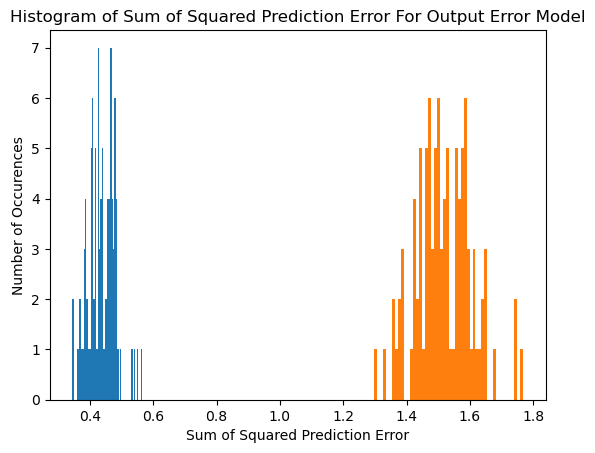

In [21]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_oe/N,bins=50)
ax.hist(V_opt_oe_under/N,bins=50)
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')


Text(0.5, 0, 'Real')

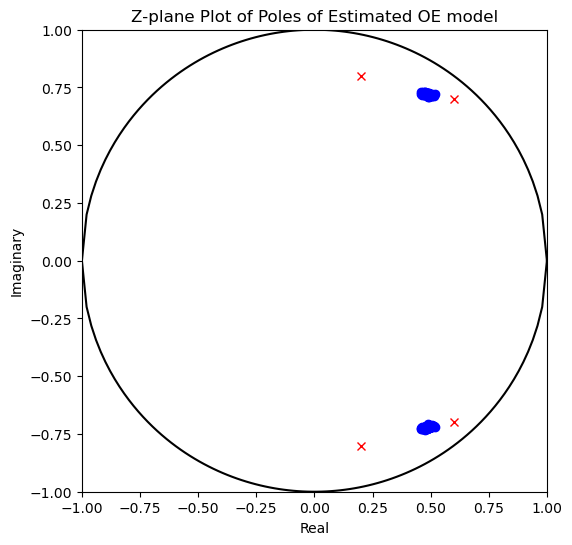

In [26]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    if not np.isnan(V_opt_oe_under[ii]):
        ax.plot(np.real(poles_oe_under[ii,:]), np.imag(poles_oe_under[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')


# Experiment 4a - Overmodelling

Suppose that we select the OE model structure. But we choose the order of the denominator and numerator to be greater than the orders of the data generating system. What happens to the bias and variance of the estimated model?

In [ ]:
nf = 6
nb = 5
nc = 0
nd = 0 
nk = 2

na = nf
n_arx = [na, nb, nk]
n_oe = [nb, nc, nd, nf, nk]

num_iter = 100
poles_oe_over1 = np.empty((num_iter,nf),dtype=complex)
V_opt_oe_over1 = np.empty(num_iter)
for ii in range(num_iter):
    #print('Iteration:',ii)
    u, y = generate_data(B0,C0,D0,F0,N,sigma_v)

    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)

    theta_oe = np.concatenate((theta_arx[n_arx[0]:n_arx[0]+n_arx[1]],theta_arx[0:n_arx[0]]))  

    optimization_results_oe = sp.optimize.least_squares(sid.V_box_jenkins, theta_oe, jac=sid.jac_V_bj, args=(n_oe,y,u))

    poles_oe_over1[ii,:] = np.roots(np.concatenate(([1],optimization_results_oe.x[n_oe[0]+n_oe[1]+n_oe[2]:n_oe[0]+n_oe[1]+n_oe[2]+n_oe[3]])))
    V_opt_oe_over1[ii] = np.sum(optimization_results_oe.fun**2)


Text(0, 0.5, 'Number of Occurences')

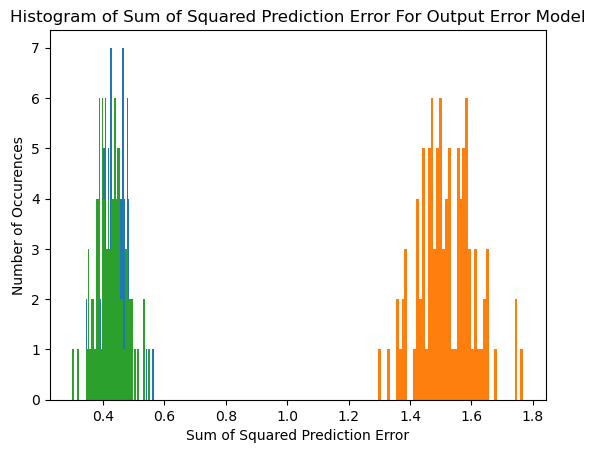

In [27]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_oe/N,bins=50)
ax.hist(V_opt_oe_under/N,bins=50)
ax.hist(V_opt_oe_over1/N,bins=50)
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')


Text(0.5, 0, 'Real')

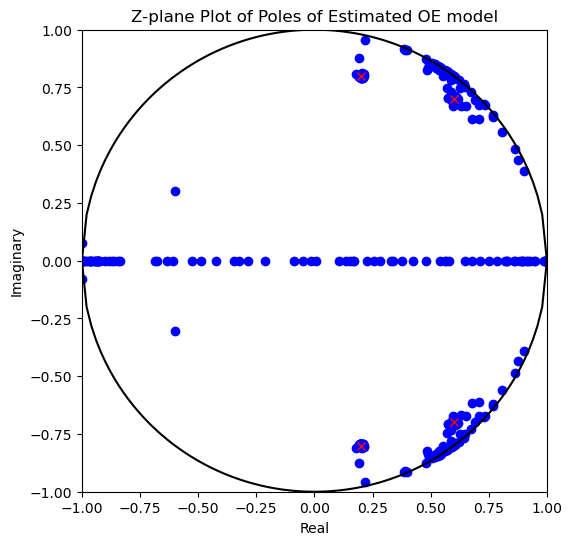

In [28]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    if not np.isnan(V_opt_oe_over1[ii]):
        ax.plot(np.real(poles_oe_over1[ii,:]), np.imag(poles_oe_over1[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')


# Experiment 4b - Overmodelling

Suppose that we select the OE model structure. But we choose the order of the denominator and numerator to be greater than the orders of the data generating system. What happens to the bias and variance of the estimated model?

In [ ]:
nf = 6
nb = 3
nc = 0
nd = 0
nk = 2

na = nf
n_arx = [na, nb, nk]
n_oe = [nb, nc, nd, nf, nk]

num_iter = 100
poles_oe_over2 = np.empty((num_iter,nf),dtype=complex)
V_opt_oe_over2 = np.empty(num_iter)
for ii in range(num_iter):
    #print('Iteration:',ii)
    u, y = generate_data(B0,C0,D0,F0,N,sigma_v)

    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)

    theta_oe = np.concatenate((theta_arx[n_arx[0]:n_arx[0]+n_arx[1]],theta_arx[0:n_arx[0]]))  

    optimization_results_oe = sp.optimize.least_squares(sid.V_box_jenkins, theta_oe, jac=sid.jac_V_bj, args=(n_oe,y,u))

    poles_oe_over2[ii,:] = np.roots(np.concatenate(([1],optimization_results_oe.x[n_oe[0]+n_oe[1]+n_oe[2]:n_oe[0]+n_oe[1]+n_oe[2]+n_oe[3]])))
    V_opt_oe_over2[ii] = np.sum(optimization_results_oe.fun**2)

Text(0, 0.5, 'Number of Occurences')

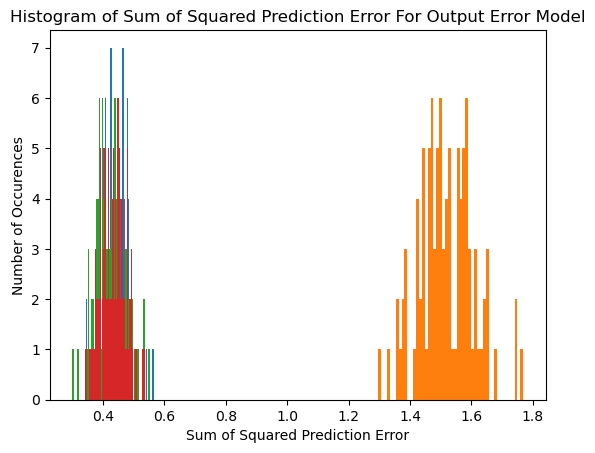

In [29]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_oe/N,bins=50)
ax.hist(V_opt_oe_under/N,bins=50)
ax.hist(V_opt_oe_over1/N,bins=50)
ax.hist(V_opt_oe_over2/N,bins=50)
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')


Text(0.5, 0, 'Real')

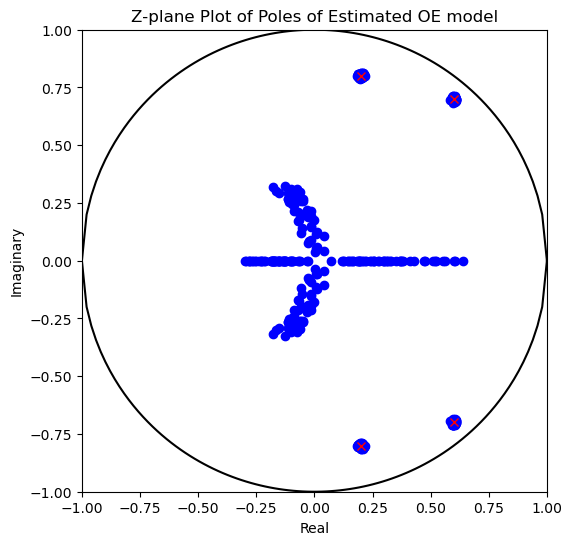

In [30]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    if not np.isnan(V_opt_oe_over2[ii]):
        ax.plot(np.real(poles_oe_over2[ii,:]), np.imag(poles_oe_over2[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')


# Analysis of Output-Error Model Structure

Now we will mathematically prove the results of the previous experiments. This will provide extra understanding and insight into the output error model structure which is critical when attempting to choose a model structure and when interpreting the results of an identification experiment. 

Recall the objective function:
$$
\begin{align*}
V_N &= \frac{1}{N}\sum_{t=0}^{N-1} (y(t)-\hat{y}(t|t-1,\theta))^2 \\
&= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg (y(t)-H^{-1}(q,\theta)G(q,\theta)u(t)-(1-H^{-1}(q,\theta))y(t) \Bigg)^2 
\end{align*}
$$
Plug in the output-error model structure:
$$
V_N = \frac{1}{N}\sum_{t=0}^{N-1} (y(t)-G(q,\theta)u(t))^2  
$$
Let the data generating system by represented as: $y(t) = G^0(q)u(t) + H^0(q)e(t)$. Using this expression we get:
$$
\begin{align*}
V_N &= \frac{1}{N}\sum_{t=0}^{N-1} (G^0(q)u(t) + H^0(q)e(t)-G(q,\theta)u(t))^2  \\
&= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg( (G^0(q)-G(q,\theta))u(t) + H^0(q)e(t)\Bigg)^2
\end{align*}
$$
Now we wish to analyse this expression from a statistical point of view. 

## Questions:
- What value of the objective function should we expect to get? 
- What is the minimizing model, or in otherwords, which model results in the smallest mean squared prediction error?

Before we continue, we must make one assumption: the input $u$ and the process noise $e$ are uncorrelated. This means that $E[u(t)e(t-\tau)]=0$ for all $\tau$. 

Now, we will take the limit as $N\to \infty$ and the expected value of the objective function to be able to answer our questions.
$$
\begin{align*}
\lim_{t\to \infty} E[V_N] &=\lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \Bigg( (G^0(q)-G(q,\theta))u(t) + H^0(q)e(t)\Bigg)^2 \Bigg] \\
&= \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( (G^0(q)-G(q,\theta))u(t) \bigg)^2 \Bigg] +  \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( H^0(q)e(t) \bigg)^2 \Bigg]
\end{align*}
$$
where in the second equality we used the assumption that $u$ and $e$ are uncorrelated. 

## Observations
- Final expression of $V_N$ consists of 2 terms, both are positive. Only one of them is a function of $\theta$. 
- This means that if we choose theta such that $G^0(q)-G(q,\theta)=0$, this is the global minimum of $V_N$. Consquently, $G(q,\theta)=G^0$ is the model that results in the smallest means squared error.
- The second term is unaffected by $\theta$, and it is equal to: 
$$
\begin{align*}
\lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( H^0(q)e(t) \bigg)^2 \Bigg] &= \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} v(t)^2 \Bigg] \\
&= \sigma_v^2,
\end{align*}
$$
where $\sigma_v^2$ is the variance of the process noise $v(t)$. 





# Final Remarks on Output-Error Model Structure

- unbiased estimates of the poles (in open loop data generating system). This is great!
- Requires iterative gradient descent optimization to find optimal model parameters. Less great.
- An initial starting point for the optimization can be the parameters that are estimated using an ARX model structure (these parameter estimates are biased, but at least we hope that they are close to the optimal parameters of the Output-Error model structure)

# Model Structures - Box-Jenkins

# Box-Jenkins Model Structure

Next, let's look at the Box Jenkins model structure:
$$
\hat{y}(t|t-1,\theta) = H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t)
$$
where
$$
\begin{align*}
G(q,\theta) &= \frac{B(q,\theta)}{F(q,\theta)} = \frac{b_0q^{-n_k}+b_1q^{n_k-1}+\cdots+b_{n_b}q^{-n_k-n_b}}{1 + f_1q^{-1}+f_2q^{-2}+\cdots+f_{n_f}q^{-n_f}}\\
H(q,\theta)&= \frac{C(q,\theta)}{D(q,\theta)} = \frac{1+c_1q^{-1}+c_2q^{-2}+\cdots+c_{n_c}q^{-n_c}}{1 + d_1q^{-1}+d_2q^{-2}+\cdots+d_{n_d}q^{-n_d}}
\end{align*}
$$
where
$$
\theta = \begin{bmatrix} b_0 \\ \vdots \\ b_{n_b} \\ c_1 \\ \vdots \\ c_{n_c} \\ d_1 \\ \vdots \\ d_{n_d} \\ f_1  \\ \vdots \\ f_{n_f} \end{bmatrix}
$$

# Experiment 5 - Compare Box-Jenkins and Output-Error Model Structures

In [17]:
nf = 4
nb = 3
nc = 2
nd = 2
na = nf
nk = 2
n_arx = [na, nb, nk]
n_bj = [nb, nc, nd, nf, nk]

n_high_order = [30,30]

sigma_v = 1

num_iter = 100
poles_box_jenkins = np.empty((num_iter,nf),dtype=complex)
V_opt_box_jenkins = np.empty(num_iter)
for ii in range(num_iter):
    print('Iteration:',ii)
    u,y = generate_data(B0,C0,D0,F0,N,sigma_v)
   
    theta_init_bj = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order,y,u) 
    optimization_results_bj = sp.optimize.least_squares(sid.V_box_jenkins, theta_init_bj, jac=sid.jac_V_bj, args=(n_bj,y,u))

    poles_box_jenkins[ii,:] = np.roots(np.concatenate(([1],optimization_results_bj.x[n_bj[0]+n_bj[1]+n_bj[2]:n_bj[0]+n_bj[1]+n_bj[2]+n_bj[3]])))
    V_opt_box_jenkins[ii] = np.sum(optimization_results_bj.fun**2)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

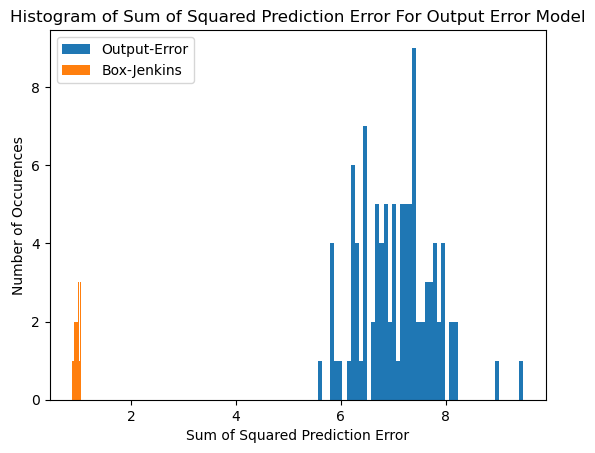

In [25]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_oe/N,bins=50,label='Output-Error')
ax.hist(V_opt_box_jenkins/N,bins=50,label='Box-Jenkins')
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')
ax.legend()


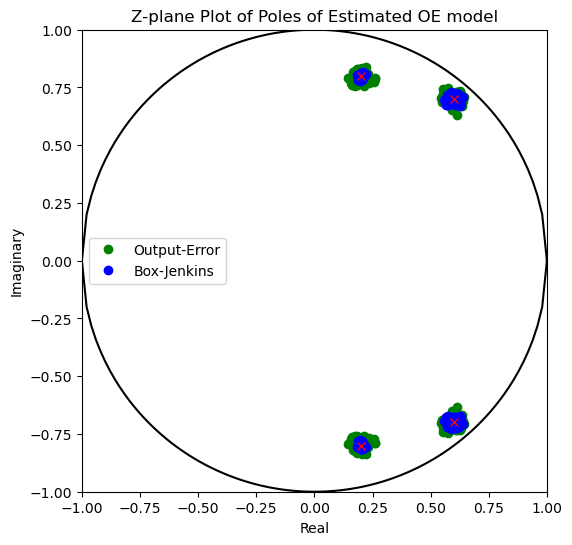

In [22]:
fig,ax = plt.subplots(1, figsize=(6,6))
ax.plot([],'go',label='Output-Error')
for ii in range(num_iter):
    if not np.isnan(V_opt_oe[ii]):
        ax.plot(np.real(poles_oe[ii,:]), np.imag(poles_oe[ii,:]), 'go')

ax.plot([],'bo',label='Box-Jenkins')
for ii in range(num_iter):
    if not np.isnan(V_opt_box_jenkins[ii]):
        ax.plot(np.real(poles_box_jenkins[ii,:]), np.imag(poles_box_jenkins[ii,:]), 'bo')
        

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')
ax.legend()

# Experiment #6 - Varying Noise Levels

In [16]:
nf = 4
nb = 3
nc = 2
nd = 2
na = nf
nk = 2
n_arx = [na, nb, nk]
n_bj = [nb, nc, nd, nf, nk]

n_high_order = [30,30]

sigma_v = 0.5
 
num_iter = 100
poles_box_jenkins_low_noise = np.empty((num_iter,nf),dtype=complex)
V_opt_box_jenkins_low_noise = np.empty(num_iter)
for ii in range(num_iter):
    print('Iteration:',ii)
    u,y = generate_data(B0,C0,D0,F0,N,sigma_v)
   
    theta_init_bj = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order,y,u) 
    optimization_results_bj = sp.optimize.least_squares(sid.V_box_jenkins, theta_init_bj, jac=sid.jac_V_bj, args=(n_bj,y,u))

    poles_box_jenkins_low_noise[ii,:] = np.roots(np.concatenate(([1],optimization_results_bj.x[n_bj[0]+n_bj[1]+n_bj[2]:n_bj[0]+n_bj[1]+n_bj[2]+n_bj[3]])))
    V_opt_box_jenkins_low_noise[ii] = np.sum(optimization_results_bj.fun**2)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

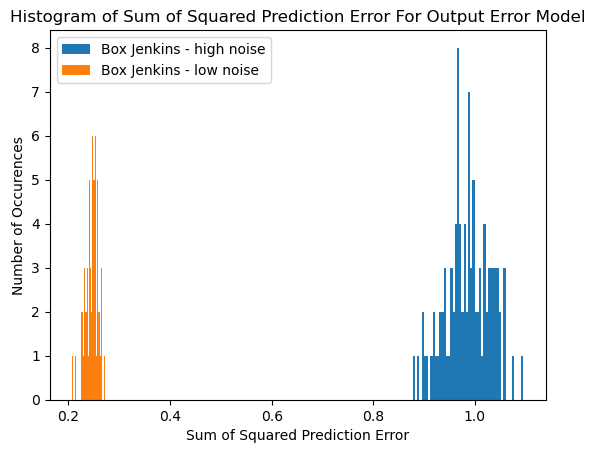

In [18]:
fig,ax = plt.subplots(1)
ax.hist(V_opt_box_jenkins/N,bins=50,label='Box Jenkins - high noise')
ax.hist(V_opt_box_jenkins_low_noise/N,bins=50,label='Box Jenkins - low noise')
ax.set_title('Histogram of Sum of Squared Prediction Error For Output Error Model')
ax.set_xlabel('Sum of Squared Prediction Error')
ax.set_ylabel('Number of Occurences')
ax.legend()


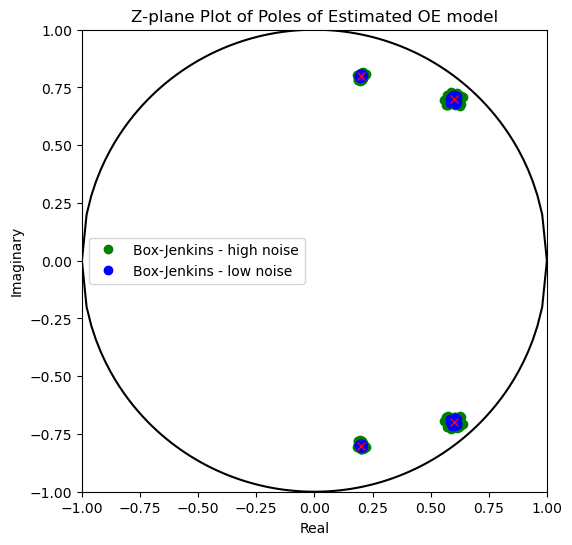

In [20]:
fig,ax = plt.subplots(1, figsize=(6,6))
ax.plot([],'go',label='Box-Jenkins - high noise')
for ii in range(num_iter):
    if not np.isnan(V_opt_box_jenkins[ii]):
        ax.plot(np.real(poles_box_jenkins[ii,:]), np.imag(poles_box_jenkins[ii,:]), 'go')

ax.plot([],'bo',label='Box-Jenkins - low noise')
for ii in range(num_iter):
    if not np.isnan(V_opt_box_jenkins_low_noise[ii]):
        ax.plot(np.real(poles_box_jenkins_low_noise[ii,:]), np.imag(poles_box_jenkins_low_noise[ii,:]), 'bo')
        

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')
ax.legend()


# Analysis of Box Jenkins Model Structure

Now we will mathematically prove the results of the previous experiments following the same reasoning as for the analysis of the Output-Error model structure. Again, this will provide extra understanding and insight into the Box-Jenkins model structure which is critical when attempting to choose a model structure and when interpreting the results of an identification experiment. 

Recall the objective function:
$$
\begin{align*}
V_N &= \frac{1}{N}\sum_{t=0}^{N-1} (y(t)-\hat{y}(t|t-1,\theta))^2 \\
&= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg (y(t)-H^{-1}(q,\theta)G(q,\theta)u(t)-(1-H^{-1}(q,\theta))y(t) \Bigg)^2 
\end{align*}
$$
Plug in the Box-Jenkins model structure:
$$
V_N = \frac{1}{N}\sum_{t=0}^{N-1} \Bigg( H^{-1}(q,\theta)( y(t)-G(q,\theta)u(t)) \Bigg )^2  
$$
Let the data generating system by represented as: $y(t) = G^0(q)u(t) + H^0(q)e(t)$. Using this expression we get:
$$
\begin{align*}
V_N &= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg( H^{-1}(q,\theta) (G^0(q)u(t) + H^0(q)e(t)-G(q,\theta)u(t)) \Bigg )^2  \\
 &= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg( H^{-1}(q,\theta) (G^0(q)u(t) -G(q,\theta)u(t) + H^0(q)e(t) + H(q,\theta)e(t)- H(q,\theta)e(t)) \Bigg )^2  \\
&= \frac{1}{N}\sum_{t=0}^{N-1} \Bigg(  H^{-1}(q,\theta) \bigg ( (G^0(q)-G(q,\theta))u(t) + (H^0(q)-H(q,\theta))e(t) \bigg) + e(t) \Bigg)^2 \\
& = \frac{1}{N}\sum_{t=0}^{N-1} \Bigg(  H^{-1}(q,\theta) \Delta G(q,\theta)u(t) + H^{-1}(q,\theta) \Delta H(q,\theta)e(t)  + e(t) \Bigg)^2, 
\end{align*}
$$
where $\Delta G(q,\theta) = G^0(q) - G(q,\theta)$, and $\Delta H(q,\theta) = H^0(q) - H(q,\theta)$
Now we wish to analyse this expression from a statistical point of view. 

## Questions:
- What value of the objective function should we expect to get, or in otherwords, what is the best prediction error we can expect when we use a Box-Jenkins model structure? 
- What is the minimizing model, or in otherwords, which model results in the smallest mean squared prediction error?

We make the same assumptions as before:
- the input $u$ and the process noise $e$ are uncorrelated. This means that $E[u(t)e(t-\tau)]=0$ for all $\tau$, 
- the noise $e$ is a sequence of independant, identically distributed random variables, which means that $e(t)$ is uncorrelated to $e(t-\tau)$ for all $\tau$ except $\tau=0$.  

Now, we will take the limit as $N\to \infty$ and the expected value of the objective function to be able to answer our questions.
$$
\begin{align*}
\lim_{t\to \infty} E[V_N] &=\lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1}  \Bigg(  H^{-1}(q,\theta) \Delta G(q,\theta)u(t) + H^{-1}(q,\theta) \Delta H(q,\theta)e(t)  + e(t) \Bigg)^2 \Bigg] \\
&= \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( H^{-1}(q,\theta)\Delta G(q,\theta)u(t) \bigg)^2 \Bigg] +  \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( H^{-1}(q,\theta)\Delta H(q,\theta)e(t) \bigg)^2 \Bigg] +  \lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( e(t) \bigg)^2 \Bigg]
\end{align*}
$$
where in the second equality we used the assumption that $u$ and $e$ are uncorrelated. 

## Observations
- Final expression of $V_N$ consists of 3 terms, all are positive:
    - First one is a function of $\theta_g$ and $\theta_h$, 
    - Second one is a function only of $\theta_h$,
    - Third one is not a function of $\theta$.  
- This means that if we choose theta such that $G^0(q)-G(q,\theta)=0$, and $H^0(q)-H(q,\theta)=0$ this is the global minimum of $V_N$. Consquently, $G(q,\theta)=G^0$ is the model that results in the smallest means squared error.
- The third term is unaffected by $\theta$, and it is equal to: 
$$
\begin{align*}
\lim_{t\to \infty} E \Bigg[ \frac{1}{N}\sum_{t=0}^{N-1} \bigg( e(t) \bigg)^2 \Bigg] &= \sigma_e^2,
\end{align*}
$$
where $\sigma_e^2$ is the variance of the process noise $e(t)$. 

# Important Point - Box-Jenkins vs Output-Error
Note that $\sigma_e^2 < \sigma_v^2$, so this means that the average prediction error of a model with the Box-Jenkins model structure is less than the avberage prediction error of a model with output-error model structure (assuming is it trained on the same data set, etc.)



# Summary of Box-Jenkins Model Structure

- unbiased estimates of the poles (in open loop data generating system). This is great!
- Requires iterative gradient descent optimization to find optimal model parameters. Less great.
- An initial starting point for the optimization can be the parameters that are estimated using an ARX model structure (these parameter estimates are biased, but at least we hope that they are close to the optimal parameters of the Output-Error model structure)
- Prediction error for the Box-Jenkins model is smaller than for the output error model structure (this is great!)

# Tabulate Results - Open Loop Data Generating System

| Model Structure | Plant Model Biased? | Noise Model Biased? | 
| --- | --- | --- | 
| Box-Jenkins | not biased  | not biased |
| ARX | biased | biased |
| OE | not biased | biased |

Main Observations:
- Even though the noise model changes from Box Jenkins to OE, the estimated poles of the plant are still unbiased. This can be generalized as a statement: In open loop identification, if the plant and noise model are parameterized independently (i.e. the plant and noise model do not share parameters) and the plant model has the correct order of numerator and denominator, then the plant estimate will be unbiased."
- If the plant and noise model share parameters however, as in the ARX, then the plant and noise model will be biased. 
- The prediction error for a Box-Jenkins model is less than the prediction error of the output error model structure.